# Network Analysis

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import ast
from community import community_louvain
import collections
from collections import Counter

## Reading in DataFrame and creating Graph object

In [2]:
df = pd.read_csv('./data/clean/combined.csv')

In [3]:
df.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
authors         object
paper           object
dtype: object

In [17]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [28]:
df['authors'] = df['authors'].apply(ast.literal_eval)

In [31]:
type(df['authors'][1]) # sanity check

list

In [19]:
df.head()

,authors,paper
0,"['Qiming Chen', 'Umeshwar Dayal']",Multi-Agent Cooperative Transactions for E-Com...
1,"['Emmanuel Cecchet', 'Renaud Lachaize', 'Takou...",Evaluation of a Group Communication Middleware...
2,"['Robert Grob', 'Stefanie Kethers', 'Stephan J...",Towards CIS in Quality Management - Integratio...
3,"['Evaggelia Pitoura', 'George Samaras', 'Panos...",An Evaluation of the Java-Based Approaches to ...
4,"['Arne Koschel', 'Günter von Bültzingsloewen',...",Poster on Accept Heterogeneity: An Event Monit...


In [46]:
df = df[~df['authors'].apply(lambda x: any(not author.strip() for author in x))]

In [47]:
G = nx.Graph()

In [48]:
for index, row in df.iterrows():
    authors = row['authors']
    for pair in combinations(authors, 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)


In [62]:
nx.write_graphml(G, './data/clean/graph.graphml')

In [63]:
del num_empty_rows, df, degrees, degreeCount, degree_sequence, degree_centrality, deg, cnt

In [49]:
max_edge = max(G.edges(data=True), key=lambda x: x[2]['weight'])
node1, node2, data = max_edge
 
print(f"Node 1: {node1}")
print(f"Node 2: {node2}")

Node 1: Makoto Takizawa 0001
Node 2: Tomoya Enokido


In [53]:
max_edge

('Makoto Takizawa 0001', 'Tomoya Enokido', {'weight': 456})

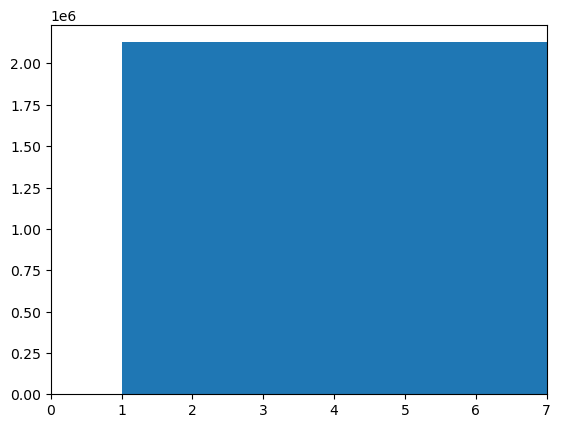

In [58]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.xlim(0,7)
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
print(degree_centrality)
print(betweenness_centrality)

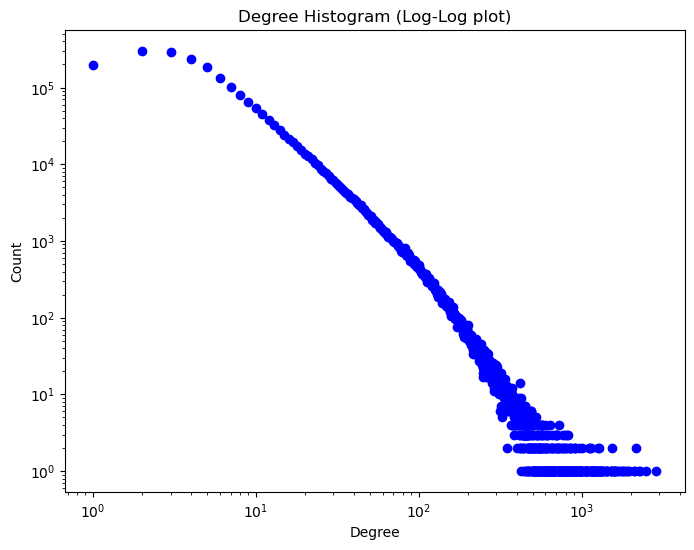

In [61]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(8,6))
plt.scatter(deg, cnt, color='b')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram (Log-Log plot)")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


## Extract Connected Components

In [67]:
connected_components = nx.connected_components(G)

# sort the components
sorted_components = sorted(connected_components, key=len, reverse=True)

# print out the largest components
for i in range(min(4, len(sorted_components))):
    print("Component", i+1, "has", len(sorted_components[i]), "nodes")

Component 1 has 2000682 nodes
Component 2 has 53 nodes
Component 3 has 49 nodes
Component 4 has 45 nodes


In [68]:
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc) # create graph for largest connected component

In [ ]:
degree_centrality = nx.degree_centrality(largest_cc_graph)
betweenness_centrality = nx.betweenness_centrality(largest_cc_graph )

In [ ]:
# compute the best partition
partiiton = community_louvain.best_partition(largest_cc_graph)
# count the number of nodes in each community
community_counts = Counter(partition.values())

# print the number of nodes in each community
for community, count in community_counts.items():
    print(f"Community {community}: {count} nodes")